#CLUSTERING K-MEANS
K-means merupakan metode pengklasteran secara partitioning yang memisahkan data ke dalam kelompok yang berbeda. Dengan partitioning secara iteratif, K-Means mampu meminimalkan rata-rata jarak setiap data ke klasternya. Dalam algoritma K-Means, setiap data harus termasuk ke cluster tertentu pada suatu tahapan proses, kemudian pada tahapan proses berikutnya dapat berpindah kecluster yang lain.

In [92]:
#import library pandas yang disini digunakan untuk mengolah data (load data)
import pandas as pd

In [93]:
#Load data
data = pd.read_csv("avocado.csv")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [94]:
#Menghapus data string
del data['Date']

In [95]:
del data['region']

In [96]:
del data['type']

In [97]:
#Menampilkan data setelah dihapus beberapa kolom
data

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


In [98]:
from sklearn.cluster import KMeans

In [99]:
#Menentukan banyaknya cluster
kmeans = KMeans(n_clusters=4)

In [100]:
#Menentukan Cluster dari data
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [101]:
#Menampilkan pusat cluster
kmeans.cluster_centers_

array([[2.41770386e+01, 1.43359442e+00, 2.39826267e+05, 7.38217728e+04,
        8.78813599e+04, 6.02082036e+03, 7.21000505e+04, 5.36721320e+04,
        1.77453996e+04, 6.82518133e+02, 2.01614610e+03],
       [1.98777778e+01, 1.14888889e+00, 2.94814914e+07, 1.06993108e+07,
        1.07367702e+07, 7.90254010e+05, 7.25515643e+06, 5.58112061e+06,
        1.58535051e+06, 8.86853093e+04, 2.01578889e+03],
       [2.49417178e+01, 1.09138804e+00, 4.44697511e+06, 1.59418776e+06,
        1.49468293e+06, 1.23110498e+05, 1.23499392e+06, 9.52022774e+05,
        2.64728904e+05, 1.82422465e+04, 2.01617101e+03],
       [2.92025316e+01, 1.02721519e+00, 3.85808526e+07, 1.35052895e+07,
        1.26152173e+07, 1.06503936e+06, 1.13953063e+07, 8.61681771e+06,
        2.60798621e+06, 1.70502353e+05, 2.01655696e+03]])

In [102]:
#Menampilkan hasil cluster
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [103]:
#import library numpy yang berfungsi untuk operasi vektor dan matriks
import numpy as np

In [104]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [105]:
#Mendefinisikan dyctionary data
dict_data = dict(zip(unique, counts))
dict_data

{0: 16776, 1: 90, 2: 1304, 3: 79}

In [106]:
#import library seaborn yang berfungsi untuk memproduksi visualisasi dengan Python
import seaborn as sns

In [107]:
data["cluster"] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


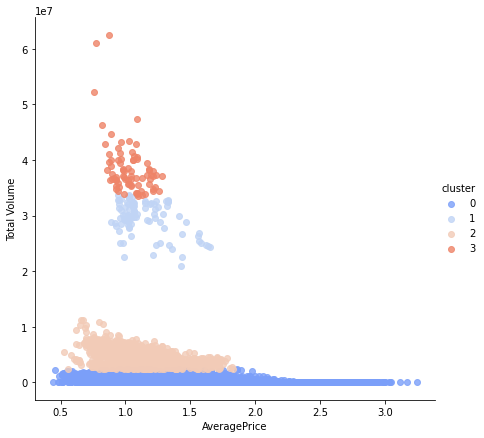

In [114]:
sns.lmplot('AveragePrice', 'Total Volume', data=data, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False);

In [109]:
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

kmeans.inertia_

1.5917535444318966e+16

In [110]:
kmeans.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [113]:
data

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,cluster
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,0
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,0
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,0
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,0


Sumber : https://github.com/JangirSumit/kmeans-clustering
Dataset : https://www.kaggle.com/neuromusic/avocado-prices